Accuracy: 0.9662162162162162
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5806
           1       0.94      1.00      0.97      5294

    accuracy                           0.97     11100
   macro avg       0.97      0.97      0.97     11100
weighted avg       0.97      0.97      0.97     11100



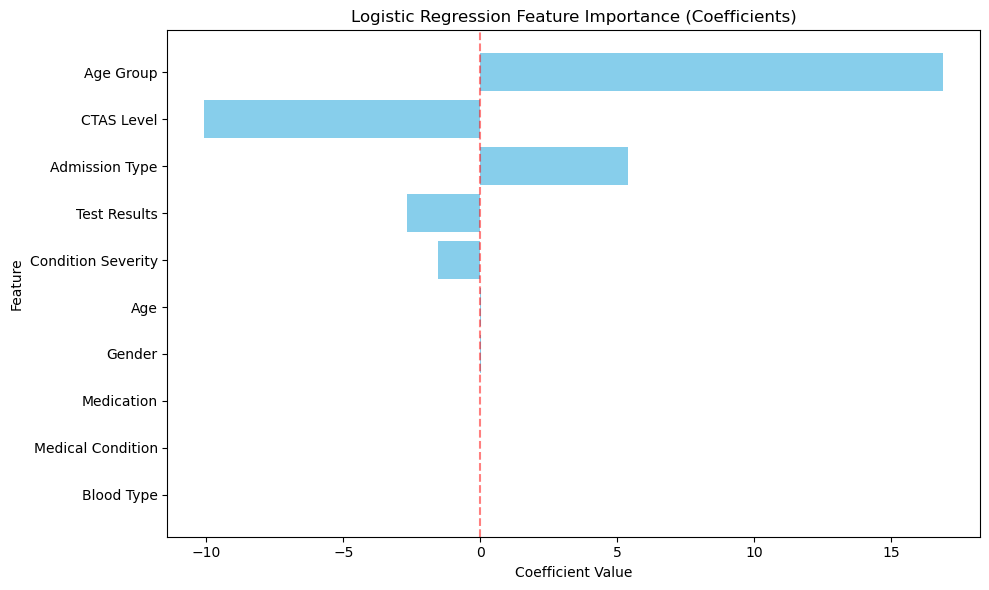

In [1]:
#without one hot encoding
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data
original_df = pd.read_csv('synthetic_healthcare_data.csv')
df = original_df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 
                 'Admission Type', 'Medication', 'Test Results', 
                 'CTAS Level', 'Condition Severity', 'Age Group', 'Churn']].copy()

# Ensure target is int
df['Churn'] = df['Churn'].astype(int)

# Split data first (avoid leakage)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label Encoding for categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use the same encoder for test data

# Scale numerical features (important for Logistic Regression)
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- Feature Importance Plot ---
# Get coefficients (Logistic Regression)
coefficients = model.coef_[0]
feature_names = X_train.columns

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': abs(coefficients)  # Magnitude matters
}).sort_values('Absolute_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()